In [1]:
import pickle
from tensorflow import keras
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Activation
from tensorflow.keras.optimizers import RMSprop, Adam, Adagrad
from matplotlib import pyplot as plt

In [2]:
# Load Training und Val Data
with open('FormatedData/100000/x_train.pickle', 'rb') as file:
    x_train = pickle.load(file)
with open('FormatedData/100000/x_val.pickle', 'rb') as file:
    x_val = pickle.load(file)
with open('FormatedData/100000/y_train.pickle', 'rb') as file:
    y_train = pickle.load(file)
with open('FormatedData/100000/y_val.pickle', 'rb') as file:
    y_val = pickle.load(file)

In [3]:
print(len(x_train))
print(len(x_val))
print(len(y_train))
print(len(y_val))

95000
5000
95000
5000


In [4]:
with open('FormatedData/100000/Metadata/context_words.pickle', 'rb') as file:
    context_words = pickle.load(file)
with open('FormatedData/100000/Metadata/unique_tokens.pickle', 'rb') as file:
    unique_tokens = pickle.load(file)

In [5]:
dropout=.5
keras.backend.clear_session()
# Create Model
model = Sequential()
model.add(LSTM(128, input_shape=(context_words, len(unique_tokens)), return_sequences=True, recurrent_dropout=dropout,  dropout=dropout))
model.add(LSTM(128, recurrent_dropout=dropout, dropout=dropout))
model.add(Dense(len(unique_tokens), activation="softmax"))

In [6]:
# Train Model
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy', TopKCategoricalAccuracy(k=5), 'categorical_accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=128, epochs=50, shuffle=True).history

Epoch 1/50
743/743 [==============================] - 431s 573ms/step - loss: 6.9383 - accuracy: 0.0627 - top_k_categorical_accuracy: 0.1711 - categorical_accuracy: 0.0627 - val_loss: 6.8116 - val_accuracy: 0.0720 - val_top_k_categorical_accuracy: 0.1790 - val_categorical_accuracy: 0.0720
Epoch 2/50
743/743 [==============================] - 426s 574ms/step - loss: 6.8167 - accuracy: 0.0628 - top_k_categorical_accuracy: 0.1726 - categorical_accuracy: 0.0628 - val_loss: 6.8008 - val_accuracy: 0.0720 - val_top_k_categorical_accuracy: 0.1790 - val_categorical_accuracy: 0.0720
Epoch 3/50
743/743 [==============================] - 425s 572ms/step - loss: 6.8062 - accuracy: 0.0628 - top_k_categorical_accuracy: 0.1726 - categorical_accuracy: 0.0628 - val_loss: 6.7994 - val_accuracy: 0.0720 - val_top_k_categorical_accuracy: 0.1790 - val_categorical_accuracy: 0.0720
Epoch 4/50
743/743 [==============================] - 429s 578ms/step - loss: 6.7821 - accuracy: 0.0628 - top_k_categorical_accura

In [7]:
# Save Model and history
model.save('Model3/Model_100000.h5')
pickle.dump(history, open("Model3/history.p", "wb"))

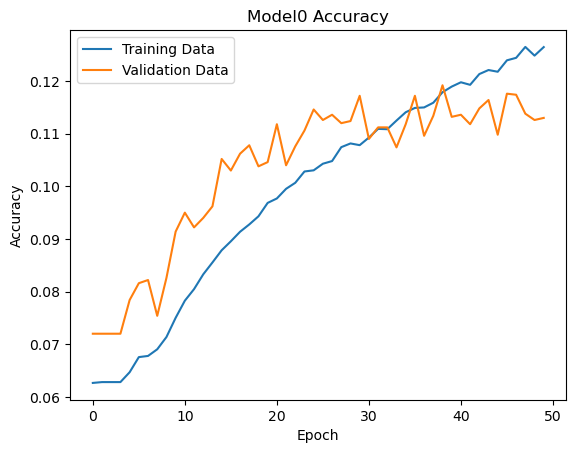

In [8]:
# Get Model stats
model = load_model('Model3/Model_100000.h5')
history = pickle.load(open("Model3/history.p", "rb"))

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model0 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper left') 

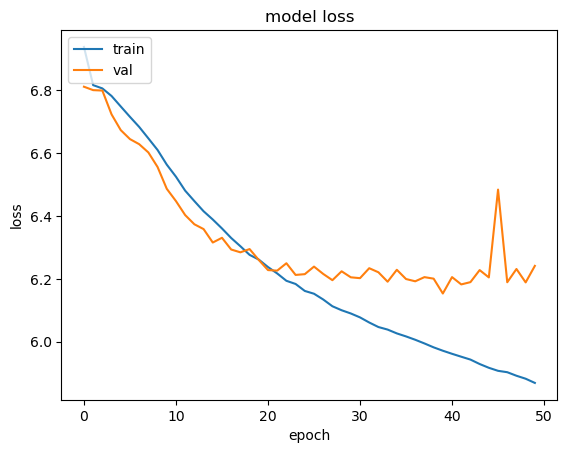

In [9]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')